## Manual Implementation of PCA

In [72]:
import numpy as np
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler

In [99]:
import pandas as pd

df = pd.read_csv(
    'datasets/Iris-Dataset/data.csv',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [75]:
X = df.ix[:,0:4].values
y = df.ix[:,4].values

In [100]:
def my_pca(data, m):
    # data: should be 2D matrix of dimension (N x n), where N is the number of instances, n is the dimension of each instance
    # m is the desired dimension of compressed data, ie. m <= n must hold
    
    N, n = data.shape
    
    # Check for validity of m
    if m > n:
        print("Invalid value of m, m must be smaller or equal to dimension of input data!")
        return
    
    # Step 1: Standardize the data
    adjusted_data = StandardScaler().fit_transform(data)
    
    # Step 2: compute the variance-covariance matrix
    covariance_mat = np.cov(adjusted_data.T)
    
    # Step 3: compute the eigenvectors and eigenvalues
    eigvals, eigvecs = LA.eig(covariance_mat)
    
    # Step 4: Rank the eigenvalues from highest to lowest 
    eig_pairs = [(np.abs(eigvals[i]), eigvecs[:,i]) for i in range(len(eigvals))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)    
    
    # Step 5: Generate projection matrix and project onto new feature space
    w = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(m)])
    output = adjusted_data.dot(w)

    return output


In [93]:
output = my_pca(X, 2)

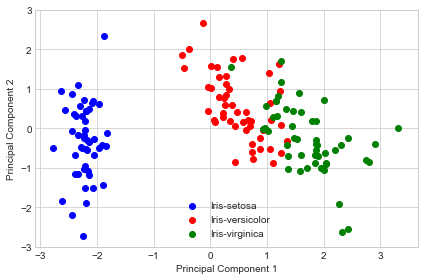

In [96]:
from matplotlib import pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(output[y==lab, 0],
                    output[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()